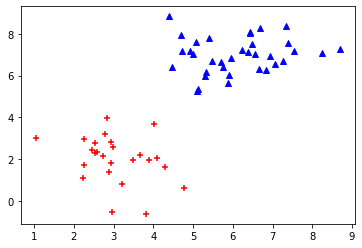

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# generate random normally distributed point clouds (customize as needed)
x1 = np.random.normal(loc=3.0, size=25)
y1 = np.random.normal(loc=2.0, size=25)
x2 = np.random.normal(loc=6.0, size=35)
y2 = np.random.normal(loc=7.0, size=35)

# now do the plotting with matplotlib
plt.scatter(x1,y1,color='red', marker='+',s=35)
plt.scatter(x2,y2,color='blue', marker= '^',s=35)

In [37]:


x= np.concatenate((x1,x2), axis=None)
y= np.concatenate((y1,y2), axis=None)
print(x.size)
print(y.size)

# merge x and y and make a 2D numpy array
data = np.vstack((x,y))

gmm = GaussianMixture(n_components=2)
gmm.fit(data)


60
60
GaussianMixture(n_components=2)


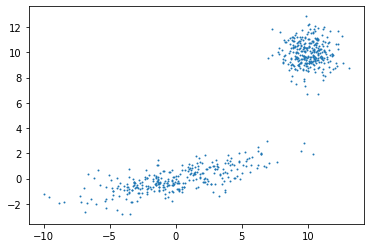

In [54]:
# Scikit learn Example to visualize

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(70)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([10, 10])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)


plt.scatter(X_train[:, 0], X_train[:, 1], .9)

plt.show()

(-20.0, 30.0, -20.0, 40.0)

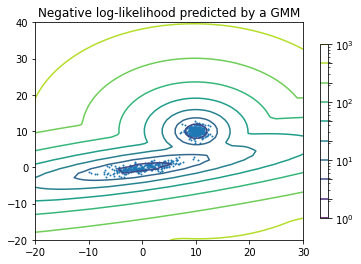

In [55]:

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .9)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')

In [56]:
# Source of example https://pypi.org/project/fuzzy-c-means/

%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [76]:
n_samples = 300

X = np.concatenate((
    np.random.normal((-1, -1), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))
fcm = FCM(n_clusters=3)
fcm.fit(X)

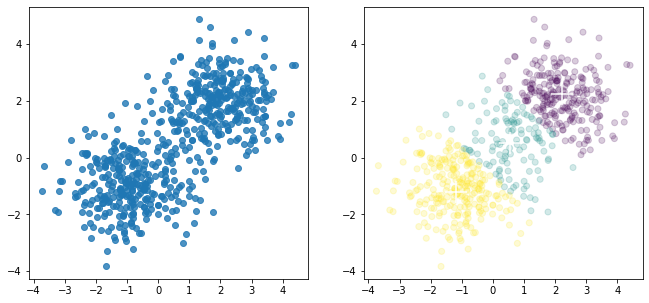

In [77]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.8)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.2)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.savefig('fuzzy-output.jpg')
plt.show()